# BÀI THỰC HÀNH 4: PHÂN TÍCH THÀNH PHẦN CHÍNH (PCA)
## Principal Component Analysis

**Họ và tên:** Bùi Quang Chiến  
**MSSV:** 23001837  
**Lớp:** K68 KHMT & TT

---

## Giới thiệu Dataset

Dataset: **Parkinson's Disease Speech Features**
- Dữ liệu đặc trưng giọng nói của bệnh nhân Parkinson
- Số lượng features: 753 đặc trưng
- Mục tiêu: Phân loại bệnh nhân có bị Parkinson hay không (class: 0 hoặc 1)

## Bài 1: Import thư viện và đọc dữ liệu

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Đã import thành công các thư viện!")

Đã import thành công các thư viện!


In [2]:
# Đọc dữ liệu
df = pd.read_csv('pd_speech_features.csv')

print("=" * 70)
print("THÔNG TIN DỮ LIỆU")
print("=" * 70)
print(f"Kích thước dataset: {df.shape}")
print(f"Số lượng mẫu: {df.shape[0]}")
print(f"Số lượng features: {df.shape[1] - 1}")
print("\n5 dòng đầu tiên:")
display(df.head())

THÔNG TIN DỮ LIỆU
Kích thước dataset: (756, 755)
Số lượng mẫu: 756
Số lượng features: 754

5 dòng đầu tiên:


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


## Bài 2: Phân tích thăm dò dữ liệu (EDA)

In [3]:
# Kiểm tra thông tin dữ liệu
print("=" * 70)
print("THÔNG TIN CHI TIẾT VỀ DỮ LIỆU")
print("=" * 70)
df.info()

THÔNG TIN CHI TIẾT VỀ DỮ LIỆU
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [4]:
# Kiểm tra missing values
print("=" * 70)
print("KIỂM TRA MISSING VALUES")
print("=" * 70)
missing_values = df.isnull().sum()
print(f"Tổng số missing values: {missing_values.sum()}")
if missing_values.sum() > 0:
    print("\nCác cột có missing values:")
    print(missing_values[missing_values > 0])
else:
    print("✓ Không có missing values trong dataset")

KIỂM TRA MISSING VALUES
Tổng số missing values: 0
✓ Không có missing values trong dataset


In [5]:
# Thống kê mô tả
print("=" * 70)
print("THỐNG KÊ MÔ TẢ")
print("=" * 70)
display(df.describe())

THỐNG KÊ MÔ TẢ


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


PHÂN BỐ NHÃN LỚP
class
1    564
0    192
Name: count, dtype: int64

Tỷ lệ: 
class
1    74.603175
0    25.396825
Name: proportion, dtype: float64


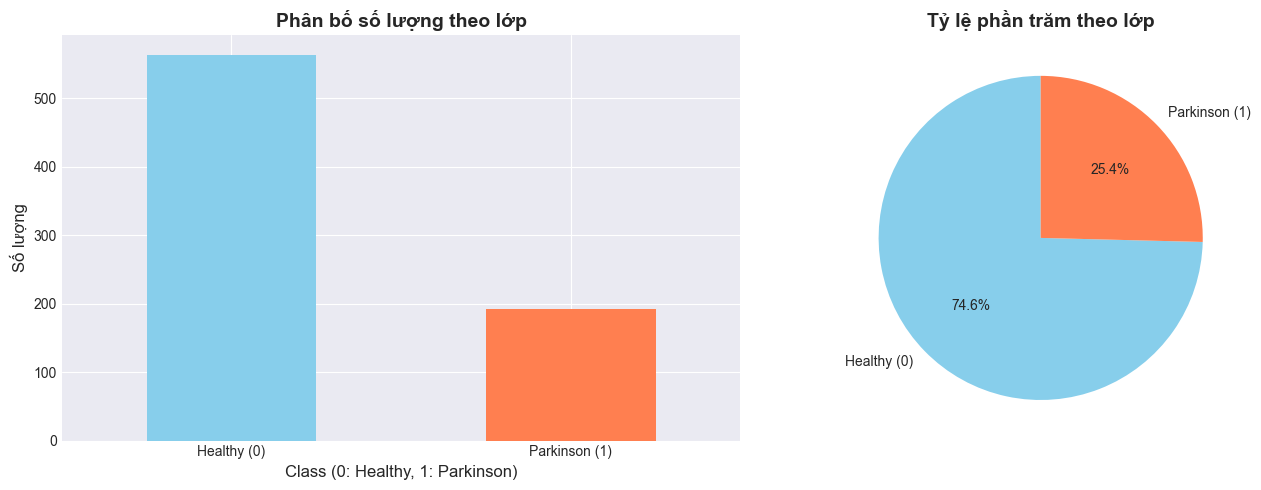

In [6]:
# Phân bố nhãn lớp
print("=" * 70)
print("PHÂN BỐ NHÃN LỚP")
print("=" * 70)
class_distribution = df['class'].value_counts()
print(class_distribution)
print(f"\nTỷ lệ: ")
print(df['class'].value_counts(normalize=True) * 100)

# Visualize phân bố lớp
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
class_distribution.plot(kind='bar', ax=axes[0], color=['skyblue', 'coral'])
axes[0].set_title('Phân bố số lượng theo lớp', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0: Healthy, 1: Parkinson)', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].set_xticklabels(['Healthy (0)', 'Parkinson (1)'], rotation=0)

# Pie chart
axes[1].pie(class_distribution, labels=['Healthy (0)', 'Parkinson (1)'], 
            autopct='%1.1f%%', startangle=90, colors=['skyblue', 'coral'])
axes[1].set_title('Tỷ lệ phần trăm theo lớp', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Bài 3: Tiền xử lý dữ liệu

In [7]:
# Tách features và target
# Loại bỏ các cột không cần thiết (id, gender nếu có)
columns_to_drop = ['id', 'class']
if 'gender' in df.columns:
    columns_to_drop.append('gender')

X = df.drop(columns=columns_to_drop)
y = df['class']

print("=" * 70)
print("TÁCH DỮ LIỆU")
print("=" * 70)
print(f"Shape của X (features): {X.shape}")
print(f"Shape của y (target): {y.shape}")
print(f"Số lượng features: {X.shape[1]}")

TÁCH DỮ LIỆU
Shape của X (features): (756, 752)
Shape của y (target): (756,)
Số lượng features: 752


In [8]:
# Chuẩn hóa dữ liệu (StandardScaler)
print("=" * 70)
print("CHUẨN HÓA DỮ LIỆU")
print("=" * 70)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✓ Đã chuẩn hóa dữ liệu")
print(f"Mean của dữ liệu sau khi chuẩn hóa: {np.mean(X_scaled):.10f}")
print(f"Std của dữ liệu sau khi chuẩn hóa: {np.std(X_scaled):.10f}")

# Tạo DataFrame cho dữ liệu đã chuẩn hóa
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\n5 dòng đầu tiên của dữ liệu đã chuẩn hóa:")
display(X_scaled_df.head())

CHUẨN HÓA DỮ LIỆU
✓ Đã chuẩn hóa dữ liệu
Mean của dữ liệu sau khi chuẩn hóa: -0.0000000000
Std của dữ liệu sau khi chuẩn hóa: 1.0000000000

5 dòng đầu tiên của dữ liệu đã chuẩn hóa:


,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.627644,0.256144,0.605835,-0.846892,-0.842373,0.933328,-0.407251,-0.054993,0.037843,0.066329,...,-0.445877,-0.584822,-0.619412,-0.576762,-0.482286,-0.399331,-0.484533,-0.775137,-0.814727,-0.366595
1,0.121620,-0.080433,0.368415,-0.907404,-0.902773,1.040014,-0.426092,-0.142570,-0.027698,-0.086722,...,-0.445730,-0.584895,-0.589778,0.193084,0.016183,-0.067120,-0.175566,-0.526647,-0.582972,0.400396
2,0.617950,-0.349839,0.733609,-0.927575,-0.922907,1.084576,-0.443557,-0.214916,-0.088871,-0.035705,...,-0.446030,-0.584767,-0.629033,-0.356261,-0.156055,-0.067593,-0.463462,-0.756063,-0.804390,-0.780935
3,-1.980560,1.382279,0.753631,-1.472186,-1.466513,2.464215,-0.275316,0.710353,1.256919,0.903010,...,-0.321598,-0.532242,-0.591137,-0.522406,0.008400,-0.449894,-0.470865,-0.633475,-0.588387,-0.801583
4,-2.472989,1.398068,0.300123,-0.887233,-0.882640,0.987044,3.143597,1.152045,1.178269,1.076468,...,-0.300835,-0.475545,-0.521356,-0.490090,-0.404833,-0.249678,-0.042021,-0.419354,-0.672216,-0.741477


## Bài 4: Áp dụng PCA

### 4.1. PCA với tất cả các thành phần

In [9]:
# Áp dụng PCA với tất cả các thành phần
print("=" * 70)
print("ÁP DỤNG PCA VỚI TẤT CẢ CÁC THÀNH PHẦN")
print("=" * 70)

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

print(f"Số lượng thành phần: {pca_full.n_components_}")
print(f"Shape của dữ liệu sau PCA: {X_pca_full.shape}")
print(f"\nTổng phương sai giải thích: {pca_full.explained_variance_ratio_.sum():.6f}")

ÁP DỤNG PCA VỚI TẤT CẢ CÁC THÀNH PHẦN
Số lượng thành phần: 752
Shape của dữ liệu sau PCA: (756, 752)

Tổng phương sai giải thích: 1.000000


PHÂN TÍCH EXPLAINED VARIANCE

10 Principal Components đầu tiên:
PC1: 0.129533 (0.129533 cumulative)
PC2: 0.093818 (0.223351 cumulative)
PC3: 0.082632 (0.305983 cumulative)
PC4: 0.042934 (0.348917 cumulative)
PC5: 0.035708 (0.384625 cumulative)
PC6: 0.029988 (0.414613 cumulative)
PC7: 0.025136 (0.439749 cumulative)
PC8: 0.022101 (0.461850 cumulative)
PC9: 0.020349 (0.482199 cumulative)
PC10: 0.018262 (0.500462 cumulative)


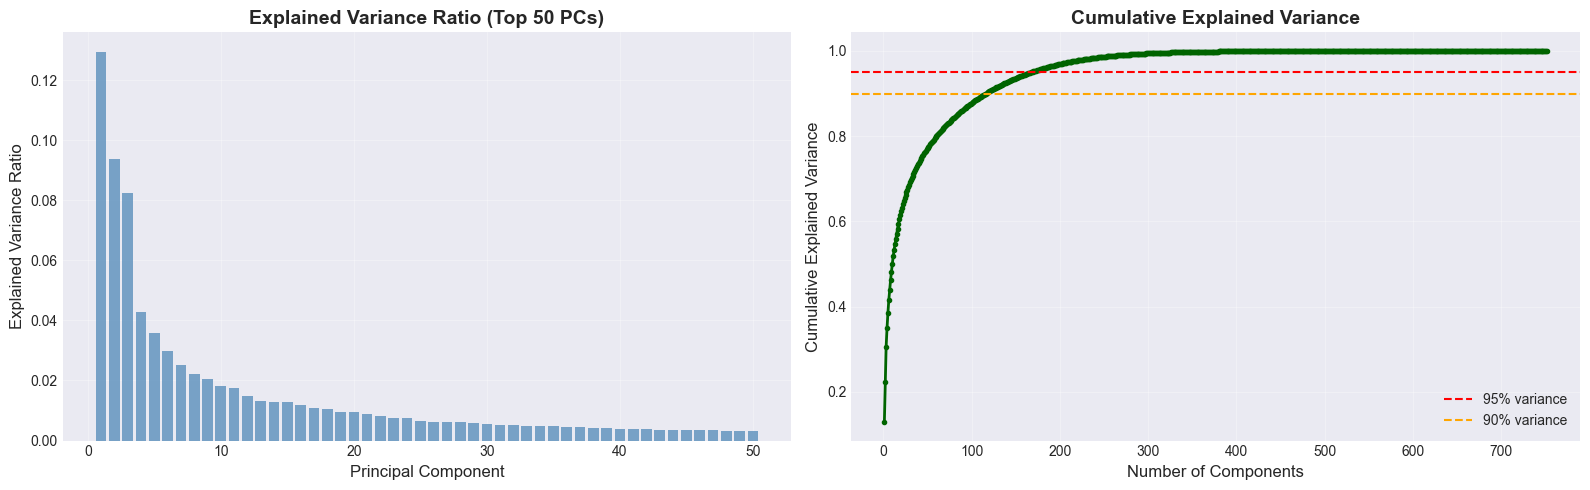

In [10]:
# Biểu đồ Explained Variance Ratio
print("=" * 70)
print("PHÂN TÍCH EXPLAINED VARIANCE")
print("=" * 70)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# In ra thông tin 10 thành phần đầu tiên
print("\n10 Principal Components đầu tiên:")
for i in range(min(10, len(explained_variance))):
    print(f"PC{i+1}: {explained_variance[i]:.6f} ({cumulative_variance[i]:.6f} cumulative)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Explained Variance Ratio của 50 thành phần đầu
n_components_to_plot = min(50, len(explained_variance))
axes[0].bar(range(1, n_components_to_plot + 1), 
            explained_variance[:n_components_to_plot],
            alpha=0.7, color='steelblue')
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title(f'Explained Variance Ratio (Top {n_components_to_plot} PCs)', 
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Cumulative Explained Variance
axes[1].plot(range(1, len(cumulative_variance) + 1), 
             cumulative_variance, 
             marker='o', markersize=3, color='darkgreen', linewidth=2)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% variance')
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='90% variance')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2. Xác định số lượng thành phần tối ưu

In [11]:
# Tìm số lượng thành phần để giữ lại 95% phương sai
print("=" * 70)
print("XÁC ĐỊNH SỐ LƯỢNG THÀNH PHẦN TỐI ƯU")
print("=" * 70)

variance_thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]

for threshold in variance_thresholds:
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    print(f"Số thành phần để giữ {threshold*100:.0f}% phương sai: {n_components}")
    print(f"  → Giảm từ {X_scaled.shape[1]} xuống {n_components} features")
    print(f"  → Tỷ lệ giảm: {(1 - n_components/X_scaled.shape[1])*100:.2f}%\n")

XÁC ĐỊNH SỐ LƯỢNG THÀNH PHẦN TỐI ƯU
Số thành phần để giữ 80% phương sai: 61
  → Giảm từ 752 xuống 61 features
  → Tỷ lệ giảm: 91.89%

Số thành phần để giữ 85% phương sai: 84
  → Giảm từ 752 xuống 84 features
  → Tỷ lệ giảm: 88.83%

Số thành phần để giữ 90% phương sai: 116
  → Giảm từ 752 xuống 116 features
  → Tỷ lệ giảm: 84.57%

Số thành phần để giữ 95% phương sai: 168
  → Giảm từ 752 xuống 168 features
  → Tỷ lệ giảm: 77.66%

Số thành phần để giữ 99% phương sai: 270
  → Giảm từ 752 xuống 270 features
  → Tỷ lệ giảm: 64.10%



### 4.3. Áp dụng PCA với số thành phần tối ưu

In [12]:
# Áp dụng PCA với 95% phương sai
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print("=" * 70)
print(f"ÁP DỤNG PCA VỚI {n_components_95} THÀNH PHẦN (95% PHƯƠNG SAI)")
print("=" * 70)

pca_optimal = PCA(n_components=n_components_95)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

print(f"Shape gốc: {X_scaled.shape}")
print(f"Shape sau PCA: {X_pca_optimal.shape}")
print(f"\nPhương sai được giữ lại: {pca_optimal.explained_variance_ratio_.sum():.6f}")
print(f"Tỷ lệ giảm chiều: {(1 - n_components_95/X_scaled.shape[1])*100:.2f}%")

ÁP DỤNG PCA VỚI 168 THÀNH PHẦN (95% PHƯƠNG SAI)
Shape gốc: (756, 752)
Shape sau PCA: (756, 168)

Phương sai được giữ lại: 0.949907
Tỷ lệ giảm chiều: 77.66%


## Bài 5: Visualize dữ liệu sau PCA

### 5.1. Visualize 2D (2 Principal Components đầu tiên)

VISUALIZE DỮ LIỆU 2D
PC1 explained variance: 0.129533
PC2 explained variance: 0.093818
Total variance explained: 0.223351


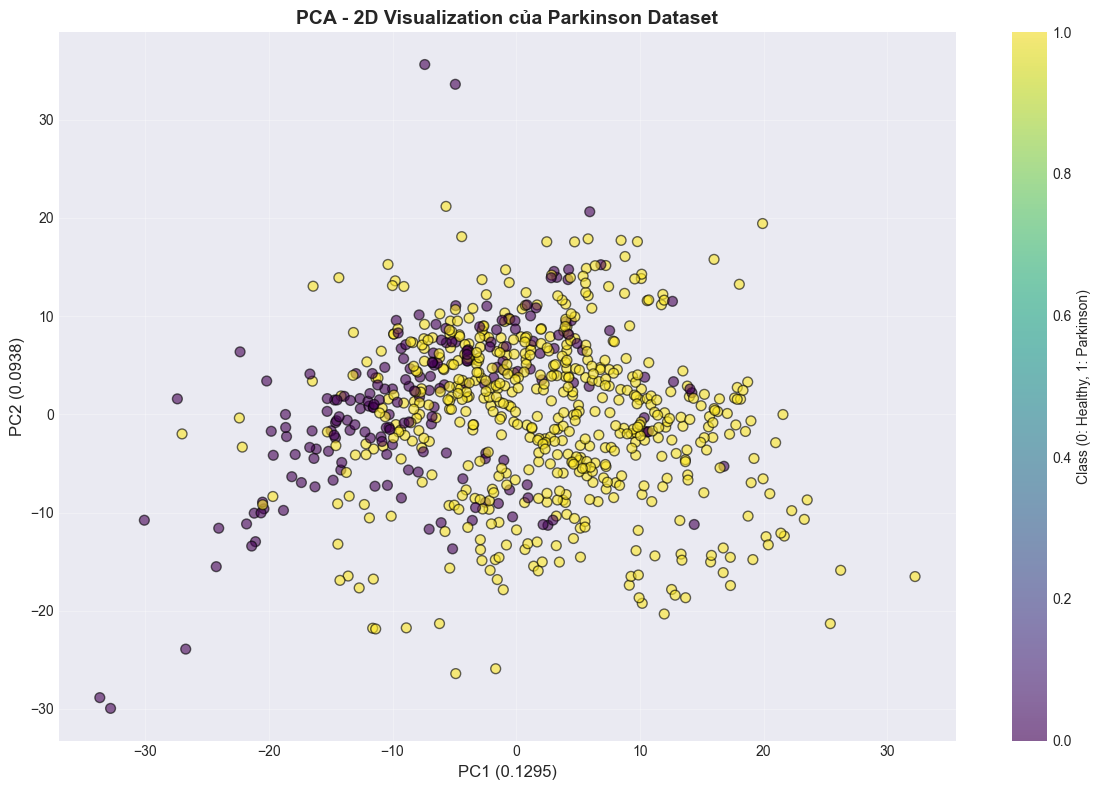

In [13]:
# PCA với 2 thành phần để visualize
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print("=" * 70)
print("VISUALIZE DỮ LIỆU 2D")
print("=" * 70)
print(f"PC1 explained variance: {pca_2d.explained_variance_ratio_[0]:.6f}")
print(f"PC2 explained variance: {pca_2d.explained_variance_ratio_[1]:.6f}")
print(f"Total variance explained: {pca_2d.explained_variance_ratio_.sum():.6f}")

# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                      c=y, cmap='viridis', 
                      alpha=0.6, edgecolors='k', s=50)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.4f})', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.4f})', fontsize=12)
plt.title('PCA - 2D Visualization của Parkinson Dataset', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Class (0: Healthy, 1: Parkinson)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5.2. Visualize 3D (3 Principal Components đầu tiên)

VISUALIZE DỮ LIỆU 3D
PC1 explained variance: 0.129533
PC2 explained variance: 0.093818
PC3 explained variance: 0.082632
Total variance explained: 0.305983


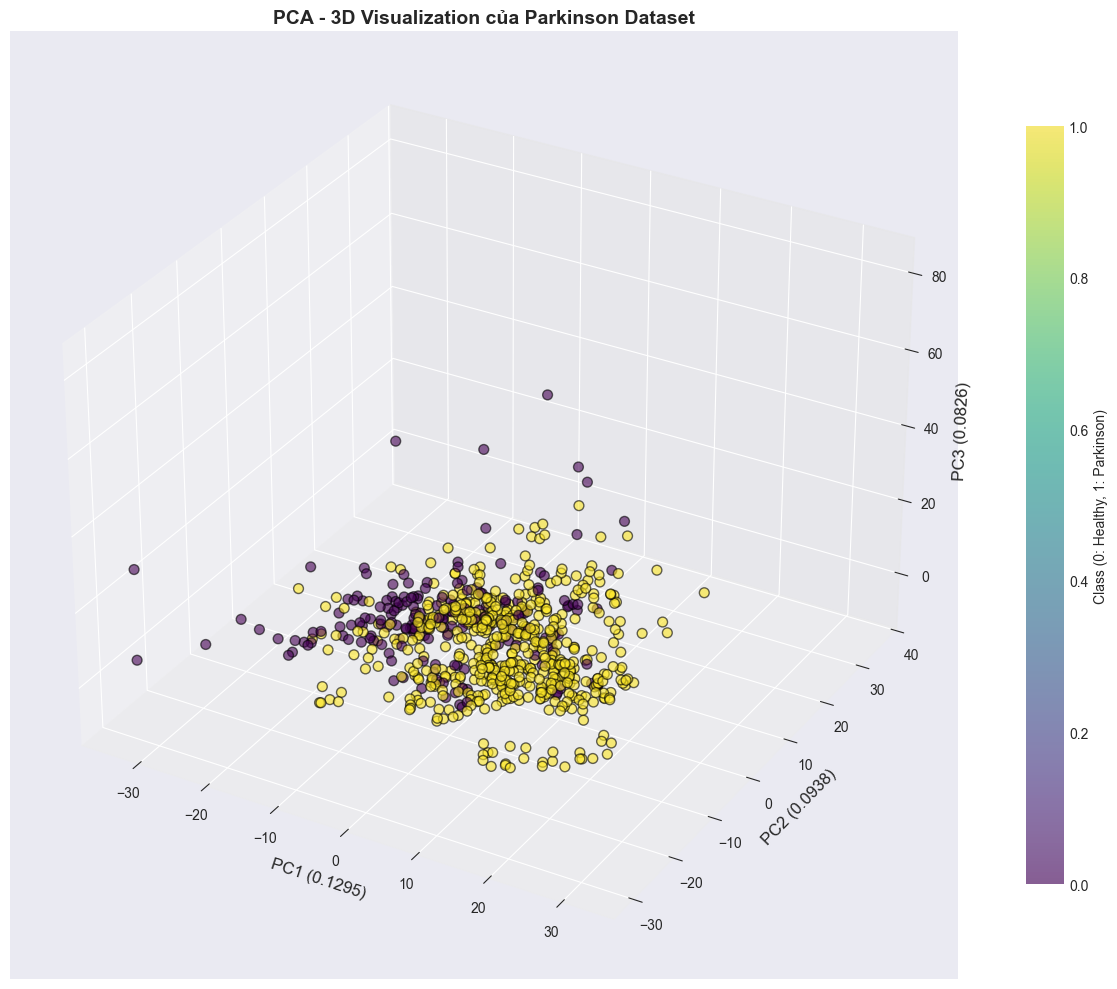

In [14]:
# PCA với 3 thành phần
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print("=" * 70)
print("VISUALIZE DỮ LIỆU 3D")
print("=" * 70)
print(f"PC1 explained variance: {pca_3d.explained_variance_ratio_[0]:.6f}")
print(f"PC2 explained variance: {pca_3d.explained_variance_ratio_[1]:.6f}")
print(f"PC3 explained variance: {pca_3d.explained_variance_ratio_[2]:.6f}")
print(f"Total variance explained: {pca_3d.explained_variance_ratio_.sum():.6f}")

# 3D Scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=y, cmap='viridis', 
                     alpha=0.6, edgecolors='k', s=50)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.4f})', fontsize=12)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.4f})', fontsize=12)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.4f})', fontsize=12)
ax.set_title('PCA - 3D Visualization của Parkinson Dataset', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Class (0: Healthy, 1: Parkinson)', shrink=0.8)
plt.tight_layout()
plt.show()

## Bài 6: So sánh hiệu suất mô hình

### 6.1. Chia dữ liệu train/test

In [15]:
# Chia dữ liệu cho dữ liệu gốc (đã chuẩn hóa)
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Chia dữ liệu cho dữ liệu sau PCA
X_train_pca, X_test_pca, _, _ = train_test_split(
    X_pca_optimal, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 70)
print("CHIA DỮ LIỆU TRAIN/TEST")
print("=" * 70)
print("Dữ liệu gốc (sau chuẩn hóa):")
print(f"  Training set: {X_train_orig.shape}")
print(f"  Test set: {X_test_orig.shape}")
print("\nDữ liệu sau PCA:")
print(f"  Training set: {X_train_pca.shape}")
print(f"  Test set: {X_test_pca.shape}")
print(f"\nPhân bố lớp trong tập train:")
print(y_train.value_counts())

CHIA DỮ LIỆU TRAIN/TEST
Dữ liệu gốc (sau chuẩn hóa):
  Training set: (604, 752)
  Test set: (152, 752)

Dữ liệu sau PCA:
  Training set: (604, 168)
  Test set: (152, 168)

Phân bố lớp trong tập train:
class
1    451
0    153
Name: count, dtype: int64


### 6.2. Huấn luyện và đánh giá Logistic Regression

In [16]:
print("=" * 70)
print("LOGISTIC REGRESSION")
print("=" * 70)

# Model với dữ liệu gốc
lr_orig = LogisticRegression(max_iter=1000, random_state=42)
lr_orig.fit(X_train_orig, y_train)
y_pred_lr_orig = lr_orig.predict(X_test_orig)
acc_lr_orig = accuracy_score(y_test, y_pred_lr_orig)

print("\n1. Dữ liệu GỐC (sau chuẩn hóa):")
print(f"Accuracy: {acc_lr_orig:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_orig, 
                          target_names=['Healthy (0)', 'Parkinson (1)']))

# Model với dữ liệu sau PCA
lr_pca = LogisticRegression(max_iter=1000, random_state=42)
lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)
acc_lr_pca = accuracy_score(y_test, y_pred_lr_pca)

print("\n2. Dữ liệu SAU PCA:")
print(f"Accuracy: {acc_lr_pca:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_pca,
                          target_names=['Healthy (0)', 'Parkinson (1)']))

print("\n" + "=" * 70)
print(f"So sánh: Độ chính xác {'tăng' if acc_lr_pca > acc_lr_orig else 'giảm'} "
      f"{abs(acc_lr_pca - acc_lr_orig):.4f} sau khi áp dụng PCA")
print("=" * 70)

LOGISTIC REGRESSION

1. Dữ liệu GỐC (sau chuẩn hóa):
Accuracy: 0.8553

Classification Report:
               precision    recall  f1-score   support

  Healthy (0)       0.76      0.64      0.69        39
Parkinson (1)       0.88      0.93      0.91       113

     accuracy                           0.86       152
    macro avg       0.82      0.79      0.80       152
 weighted avg       0.85      0.86      0.85       152


2. Dữ liệu SAU PCA:
Accuracy: 0.8158

Classification Report:
               precision    recall  f1-score   support

  Healthy (0)       0.67      0.56      0.61        39
Parkinson (1)       0.86      0.90      0.88       113

     accuracy                           0.82       152
    macro avg       0.76      0.73      0.75       152
 weighted avg       0.81      0.82      0.81       152


So sánh: Độ chính xác giảm 0.0395 sau khi áp dụng PCA


### 6.3. Huấn luyện và đánh giá Decision Tree

In [17]:
print("=" * 70)
print("DECISION TREE")
print("=" * 70)

# Model với dữ liệu gốc
dt_orig = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_orig.fit(X_train_orig, y_train)
y_pred_dt_orig = dt_orig.predict(X_test_orig)
acc_dt_orig = accuracy_score(y_test, y_pred_dt_orig)

print("\n1. Dữ liệu GỐC (sau chuẩn hóa):")
print(f"Accuracy: {acc_dt_orig:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_orig,
                          target_names=['Healthy (0)', 'Parkinson (1)']))

# Model với dữ liệu sau PCA
dt_pca = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_pca.predict(X_test_pca)
acc_dt_pca = accuracy_score(y_test, y_pred_dt_pca)

print("\n2. Dữ liệu SAU PCA:")
print(f"Accuracy: {acc_dt_pca:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_pca,
                          target_names=['Healthy (0)', 'Parkinson (1)']))

print("\n" + "=" * 70)
print(f"So sánh: Độ chính xác {'tăng' if acc_dt_pca > acc_dt_orig else 'giảm'} "
      f"{abs(acc_dt_pca - acc_dt_orig):.4f} sau khi áp dụng PCA")
print("=" * 70)

DECISION TREE

1. Dữ liệu GỐC (sau chuẩn hóa):
Accuracy: 0.8289

Classification Report:
               precision    recall  f1-score   support

  Healthy (0)       0.69      0.62      0.65        39
Parkinson (1)       0.87      0.90      0.89       113

     accuracy                           0.83       152
    macro avg       0.78      0.76      0.77       152
 weighted avg       0.82      0.83      0.83       152


2. Dữ liệu SAU PCA:
Accuracy: 0.7763

Classification Report:
               precision    recall  f1-score   support

  Healthy (0)       0.59      0.41      0.48        39
Parkinson (1)       0.82      0.90      0.86       113

     accuracy                           0.78       152
    macro avg       0.70      0.66      0.67       152
 weighted avg       0.76      0.78      0.76       152


So sánh: Độ chính xác giảm 0.0526 sau khi áp dụng PCA


### 6.4. Huấn luyện và đánh giá Random Forest

In [18]:
print("=" * 70)
print("RANDOM FOREST")
print("=" * 70)

# Model với dữ liệu gốc
rf_orig = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_orig.fit(X_train_orig, y_train)
y_pred_rf_orig = rf_orig.predict(X_test_orig)
acc_rf_orig = accuracy_score(y_test, y_pred_rf_orig)

print("\n1. Dữ liệu GỐC (sau chuẩn hóa):")
print(f"Accuracy: {acc_rf_orig:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_orig,
                          target_names=['Healthy (0)', 'Parkinson (1)']))

# Model với dữ liệu sau PCA
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca)
acc_rf_pca = accuracy_score(y_test, y_pred_rf_pca)

print("\n2. Dữ liệu SAU PCA:")
print(f"Accuracy: {acc_rf_pca:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_pca,
                          target_names=['Healthy (0)', 'Parkinson (1)']))

print("\n" + "=" * 70)
print(f"So sánh: Độ chính xác {'tăng' if acc_rf_pca > acc_rf_orig else 'giảm'} "
      f"{abs(acc_rf_pca - acc_rf_orig):.4f} sau khi áp dụng PCA")
print("=" * 70)

RANDOM FOREST

1. Dữ liệu GỐC (sau chuẩn hóa):
Accuracy: 0.8421

Classification Report:
               precision    recall  f1-score   support

  Healthy (0)       0.83      0.49      0.61        39
Parkinson (1)       0.84      0.96      0.90       113

     accuracy                           0.84       152
    macro avg       0.84      0.73      0.76       152
 weighted avg       0.84      0.84      0.83       152


2. Dữ liệu SAU PCA:
Accuracy: 0.7895

Classification Report:
               precision    recall  f1-score   support

  Healthy (0)       1.00      0.18      0.30        39
Parkinson (1)       0.78      1.00      0.88       113

     accuracy                           0.79       152
    macro avg       0.89      0.59      0.59       152
 weighted avg       0.84      0.79      0.73       152


So sánh: Độ chính xác giảm 0.0526 sau khi áp dụng PCA


### 6.5. Tổng hợp và so sánh kết quả

TỔNG HỢP KẾT QUẢ SO SÁNH
              Model  Original Data  After PCA  Difference
Logistic Regression       0.855263   0.815789   -0.039474
      Decision Tree       0.828947   0.776316   -0.052632
      Random Forest       0.842105   0.789474   -0.052632



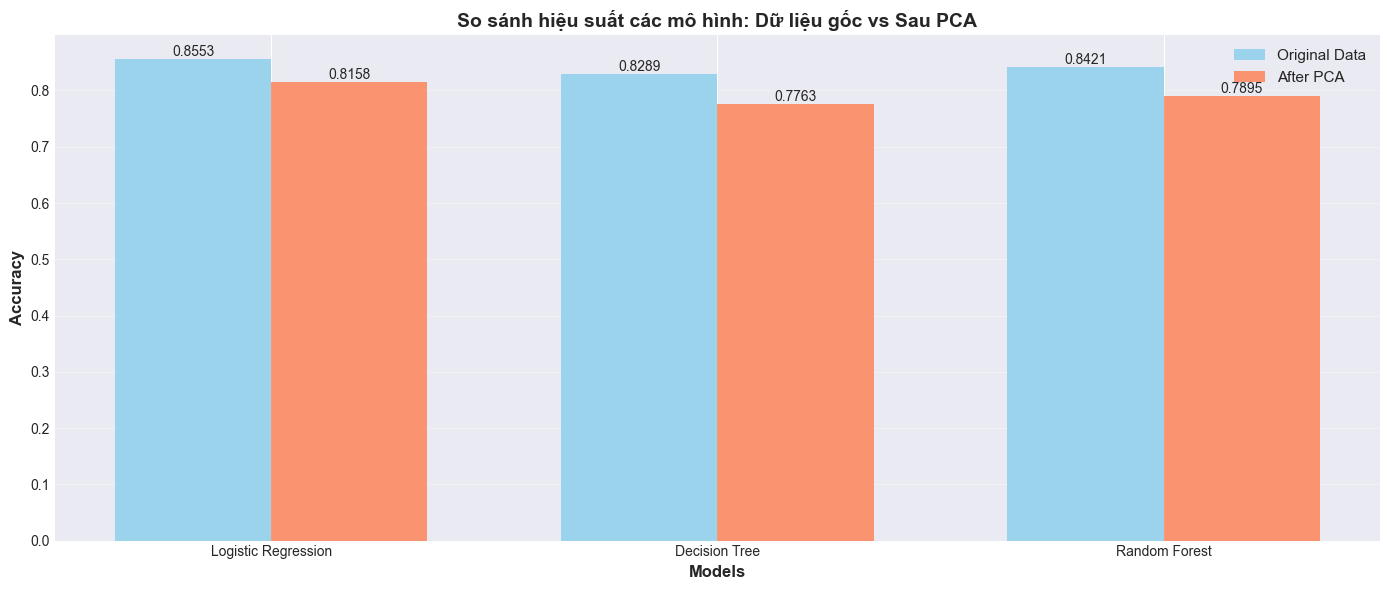

In [19]:
# Tổng hợp kết quả
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Original Data': [acc_lr_orig, acc_dt_orig, acc_rf_orig],
    'After PCA': [acc_lr_pca, acc_dt_pca, acc_rf_pca],
    'Difference': [acc_lr_pca - acc_lr_orig, 
                   acc_dt_pca - acc_dt_orig, 
                   acc_rf_pca - acc_rf_orig]
})

print("=" * 70)
print("TỔNG HỢP KẾT QUẢ SO SÁNH")
print("=" * 70)
print(results.to_string(index=False))
print("\n" + "=" * 70)

# Visualization so sánh
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(results['Model']))
width = 0.35

bars1 = ax.bar(x - width/2, results['Original Data'], width, 
               label='Original Data', color='skyblue', alpha=0.8)
bars2 = ax.bar(x + width/2, results['After PCA'], width, 
               label='After PCA', color='coral', alpha=0.8)

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('So sánh hiệu suất các mô hình: Dữ liệu gốc vs Sau PCA', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results['Model'])
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Thêm giá trị trên cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Bài 7: Confusion Matrix

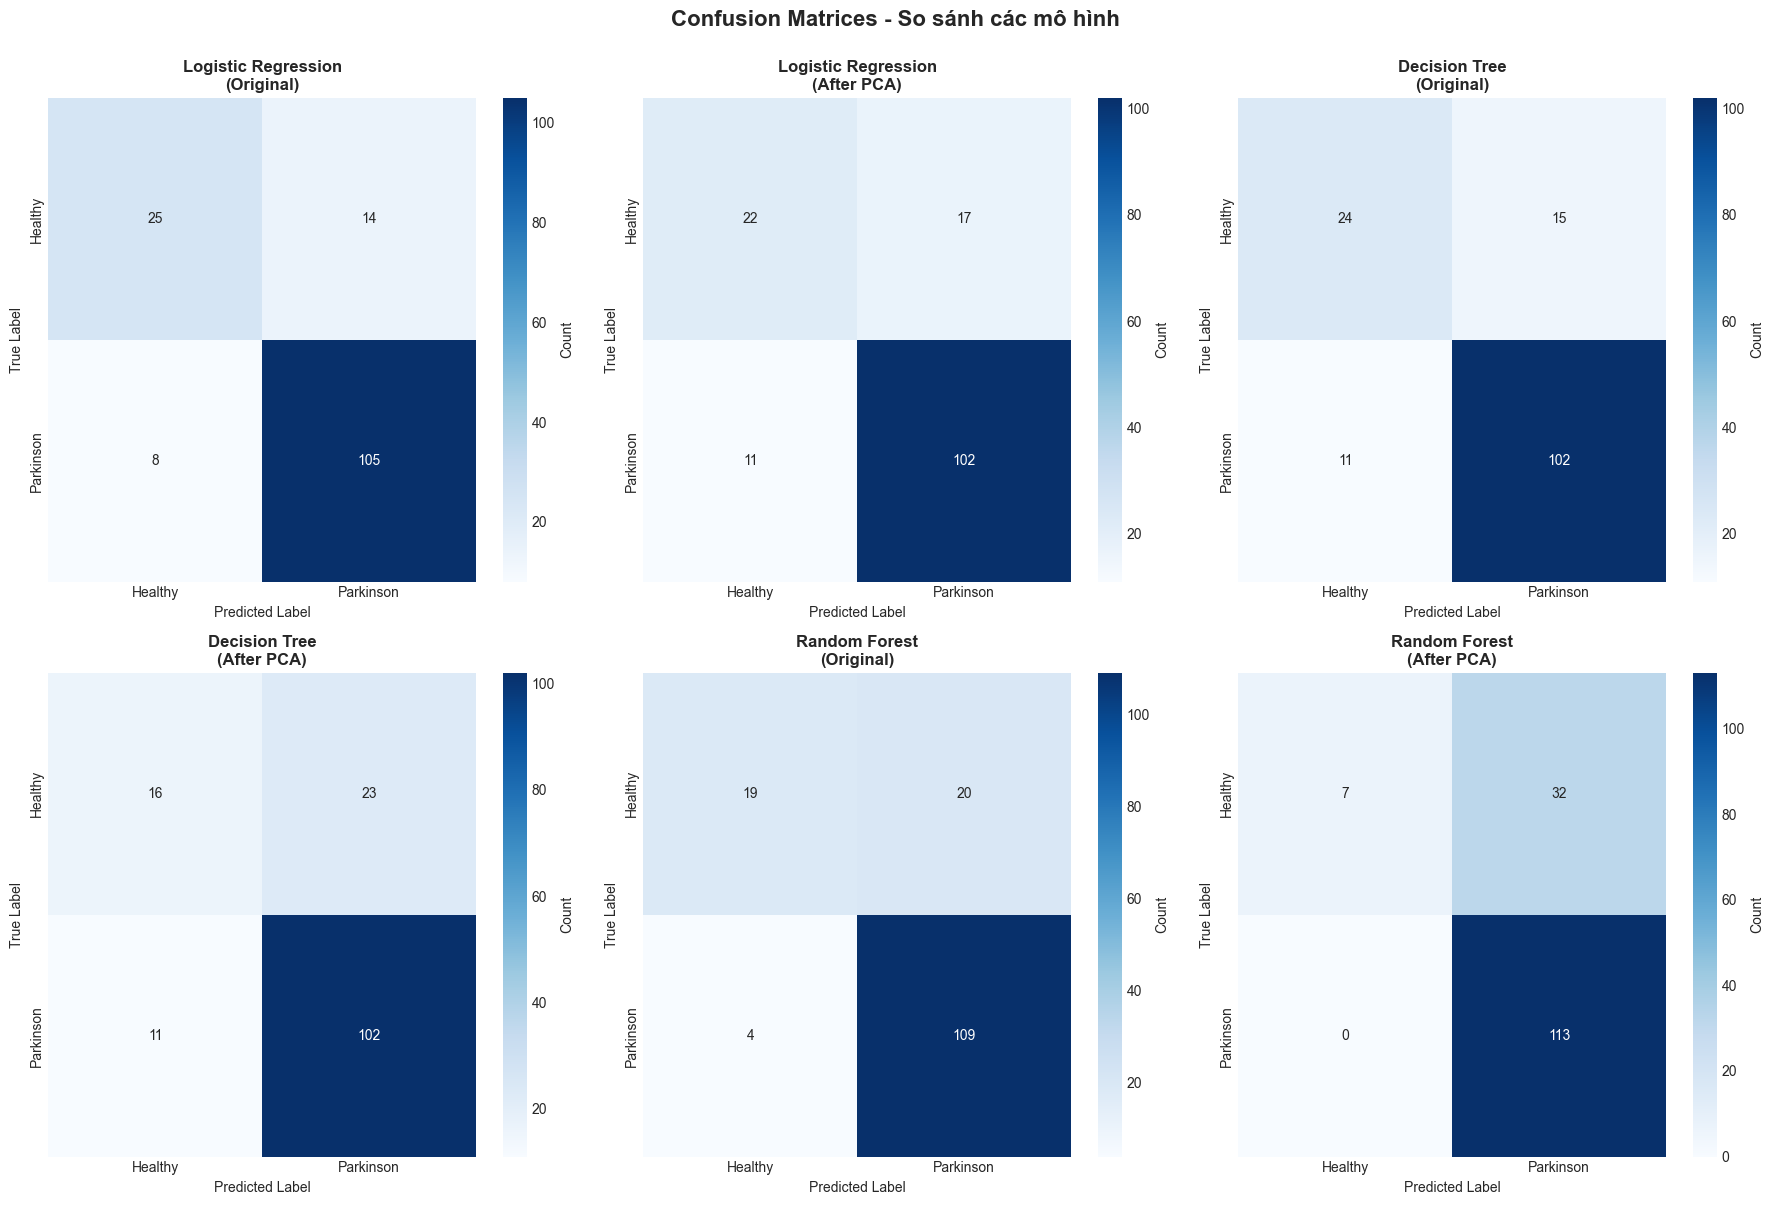

In [20]:
# Vẽ Confusion Matrix cho tất cả các mô hình
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

models = [
    ('Logistic Regression\n(Original)', y_pred_lr_orig),
    ('Logistic Regression\n(After PCA)', y_pred_lr_pca),
    ('Decision Tree\n(Original)', y_pred_dt_orig),
    ('Decision Tree\n(After PCA)', y_pred_dt_pca),
    ('Random Forest\n(Original)', y_pred_rf_orig),
    ('Random Forest\n(After PCA)', y_pred_rf_pca)
]

for idx, (title, y_pred) in enumerate(models):
    row = idx // 3
    col = idx % 3
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Healthy', 'Parkinson'],
                yticklabels=['Healthy', 'Parkinson'],
                ax=axes[row, col], cbar_kws={'label': 'Count'})
    axes[row, col].set_title(title, fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('True Label', fontsize=10)
    axes[row, col].set_xlabel('Predicted Label', fontsize=10)

plt.suptitle('Confusion Matrices - So sánh các mô hình', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## Bài 8: Phân tích ảnh hưởng của số lượng components

In [22]:
print("=" * 70)
print("PHÂN TÍCH ẢNH HƯỞNG CỦA SỐ LƯỢNG COMPONENTS")
print("=" * 70)

# Thử nghiệm với các số lượng components khác nhau
n_components_list = [5, 10, 20, 50, 100, 150, 200, n_components_95]
results_components = {
    'n_components': [],
    'variance_explained': [],
    'lr_accuracy': [],
    'dt_accuracy': [],
    'rf_accuracy': []
}

for n_comp in n_components_list:
    if n_comp > X_scaled.shape[1]:
        n_comp = X_scaled.shape[1]
    
    # Áp dụng PCA
    pca_temp = PCA(n_components=n_comp)
    X_pca_temp = pca_temp.fit_transform(X_scaled)
    
    # Chia dữ liệu
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
        X_pca_temp, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X_train_temp, y_train_temp)
    lr_acc = accuracy_score(y_test_temp, lr.predict(X_test_temp))
    
    # Decision Tree
    dt = DecisionTreeClassifier(random_state=42, max_depth=10)
    dt.fit(X_train_temp, y_train_temp)
    dt_acc = accuracy_score(y_test_temp, dt.predict(X_test_temp))
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
    rf.fit(X_train_temp, y_train_temp)
    rf_acc = accuracy_score(y_test_temp, rf.predict(X_test_temp))
    
    # Lưu kết quả
    results_components['n_components'].append(n_comp)
    results_components['variance_explained'].append(pca_temp.explained_variance_ratio_.sum())
    results_components['lr_accuracy'].append(lr_acc)
    results_components['dt_accuracy'].append(dt_acc)
    results_components['rf_accuracy'].append(rf_acc)
    
    print(f"n_components={n_comp:3d}: "
          f"Variance={pca_temp.explained_variance_ratio_.sum():.4f}, "
          f"LR={lr_acc:.4f}, DT={dt_acc:.4f}, RF={rf_acc:.4f}")

# Convert to DataFrame
df_components = pd.DataFrame(results_components)
print("\n" + "=" * 70)
print(df_components.to_string(index=False))

PHÂN TÍCH ẢNH HƯỞNG CỦA SỐ LƯỢNG COMPONENTS
n_components=  5: Variance=0.3846, LR=0.7697, DT=0.7368, RF=0.8026
n_components= 10: Variance=0.5005, LR=0.7500, DT=0.7895, RF=0.8289
n_components= 20: Variance=0.6234, LR=0.7368, DT=0.7697, RF=0.8224
n_components= 50: Variance=0.7718, LR=0.8355, DT=0.7697, RF=0.8289
n_components=100: Variance=0.8766, LR=0.8421, DT=0.7500, RF=0.8092
n_components=150: Variance=0.9353, LR=0.8026, DT=0.7566, RF=0.8026
n_components=200: Variance=0.9689, LR=0.8092, DT=0.7171, RF=0.7829
n_components=168: Variance=0.9499, LR=0.8158, DT=0.8026, RF=0.7763

 n_components  variance_explained  lr_accuracy  dt_accuracy  rf_accuracy
            5            0.384625     0.769737     0.736842     0.802632
           10            0.500462     0.750000     0.789474     0.828947
           20            0.623410     0.736842     0.769737     0.822368
           50            0.771846     0.835526     0.769737     0.828947
          100            0.876647     0.842105     0.7

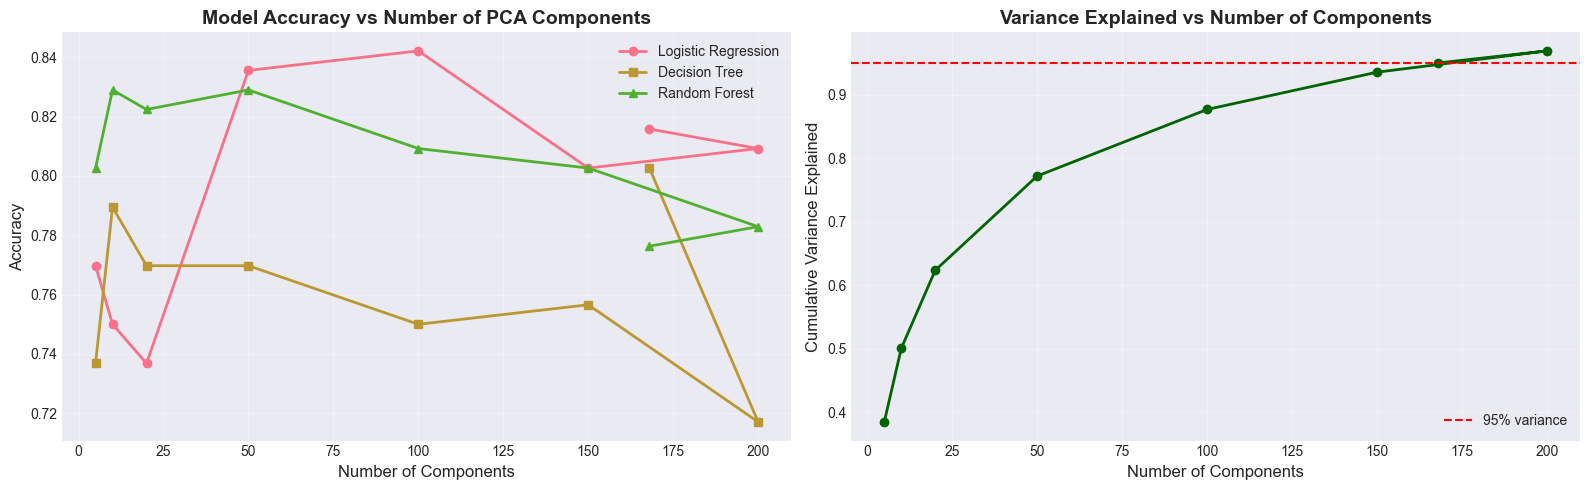

In [23]:
# Visualize ảnh hưởng của số lượng components
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Accuracy vs Number of Components
axes[0].plot(df_components['n_components'], df_components['lr_accuracy'], 
             marker='o', label='Logistic Regression', linewidth=2)
axes[0].plot(df_components['n_components'], df_components['dt_accuracy'], 
             marker='s', label='Decision Tree', linewidth=2)
axes[0].plot(df_components['n_components'], df_components['rf_accuracy'], 
             marker='^', label='Random Forest', linewidth=2)
axes[0].set_xlabel('Number of Components', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Model Accuracy vs Number of PCA Components', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Variance Explained vs Number of Components
axes[1].plot(df_components['n_components'], 
             df_components['variance_explained'], 
             marker='o', color='darkgreen', linewidth=2)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% variance')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Variance Explained', fontsize=12)
axes[1].set_title('Variance Explained vs Number of Components', 
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Bài 9: Principal Components Analysis - Chi tiết

In [24]:
# Phân tích các Principal Components
print("=" * 70)
print("PHÂN TÍCH CHI TIẾT CÁC PRINCIPAL COMPONENTS")
print("=" * 70)

# Lấy components matrix
components = pca_optimal.components_
print(f"Shape của components matrix: {components.shape}")
print(f"(n_components x n_features) = ({components.shape[0]} x {components.shape[1]})")

# Top 5 features có contribution cao nhất cho mỗi PC
feature_names = X.columns
n_top_features = 5

print(f"\nTop {n_top_features} features có contribution cao nhất cho mỗi PC:")
print("=" * 70)

for i in range(min(5, components.shape[0])):
    print(f"\nPC{i+1} (Explained variance: {pca_optimal.explained_variance_ratio_[i]:.6f}):")
    
    # Lấy indices của top features
    top_indices = np.argsort(np.abs(components[i]))[-n_top_features:][::-1]
    
    for rank, idx in enumerate(top_indices, 1):
        print(f"  {rank}. {feature_names[idx]}: {components[i][idx]:.6f}")

PHÂN TÍCH CHI TIẾT CÁC PRINCIPAL COMPONENTS
Shape của components matrix: (168, 752)
(n_components x n_features) = (168 x 752)

Top 5 features có contribution cao nhất cho mỗi PC:

PC1 (Explained variance: 0.129533):
  1. app_LT_entropy_shannon_6_coef: 0.081681
  2. app_LT_entropy_shannon_5_coef: 0.081662
  3. app_LT_TKEO_mean_10_coef: -0.081607
  4. app_LT_entropy_shannon_7_coef: 0.081600
  5. app_LT_TKEO_std_10_coef: -0.081587

PC2 (Explained variance: 0.093818):
  1. tqwt_entropy_log_dec_26: 0.072938
  2. tqwt_entropy_log_dec_25: 0.072247
  3. tqwt_maxValue_dec_19: 0.071761
  4. tqwt_maxValue_dec_8: 0.071744
  5. tqwt_minValue_dec_19: -0.071729

PC3 (Explained variance: 0.082632):
  1. det_LT_TKEO_std_3_coef: 0.096658
  2. det_LT_TKEO_std_2_coef: 0.094903
  3. det_LT_TKEO_mean_2_coef: 0.094755
  4. Ed_6_coef: 0.093492
  5. det_TKEO_std_3_coef: 0.093241

PC4 (Explained variance: 0.042934):
  1. tqwt_entropy_log_dec_36: 0.096037
  2. tqwt_TKEO_std_dec_2: -0.091919
  3. tqwt_maxValue_de

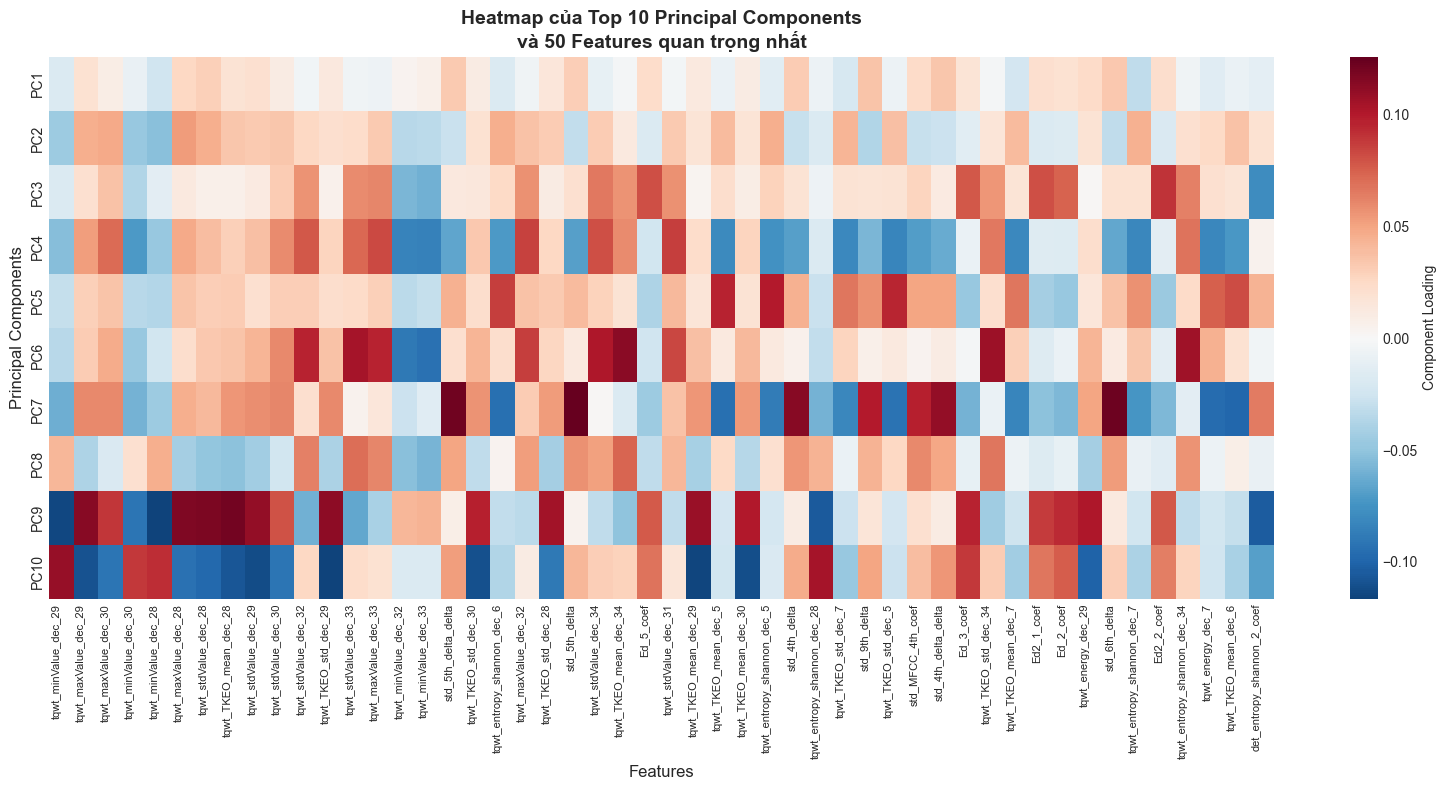

In [25]:
# Heatmap của top 10 PCs
n_pcs_to_show = min(10, components.shape[0])
n_features_to_show = 50

# Lấy top features dựa trên tổng contribution
feature_importance = np.sum(np.abs(components[:n_pcs_to_show]), axis=0)
top_feature_indices = np.argsort(feature_importance)[-n_features_to_show:][::-1]

# Tạo heatmap
plt.figure(figsize=(16, 8))
components_subset = components[:n_pcs_to_show, top_feature_indices]
feature_names_subset = feature_names[top_feature_indices]

sns.heatmap(components_subset, 
            cmap='RdBu_r', 
            center=0,
            yticklabels=[f'PC{i+1}' for i in range(n_pcs_to_show)],
            xticklabels=feature_names_subset,
            cbar_kws={'label': 'Component Loading'})
plt.title(f'Heatmap của Top {n_pcs_to_show} Principal Components\nvà {n_features_to_show} Features quan trọng nhất', 
          fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Principal Components', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

## Bài 10: Kết luận và Nhận xét

### Tổng kết kết quả

In [26]:
print("=" * 70)
print("TỔNG KẾT KẾT QUẢ")
print("=" * 70)

print(f"\n1. THÔNG TIN DATASET:")
print(f"   - Số lượng samples: {df.shape[0]}")
print(f"   - Số lượng features gốc: {X.shape[1]}")
print(f"   - Phân bố lớp: Healthy={class_distribution[0]}, Parkinson={class_distribution[1]}")

print(f"\n2. PCA ANALYSIS:")
print(f"   - Số components để giữ 95% variance: {n_components_95}")
print(f"   - Tỷ lệ giảm chiều: {(1 - n_components_95/X.shape[1])*100:.2f}%")
print(f"   - Variance được giữ lại: {pca_optimal.explained_variance_ratio_.sum():.6f}")

print(f"\n3. SO SÁNH HIỆU SUẤT MÔ HÌNH:")
print("\n   Original Data vs After PCA:")
for idx, row in results.iterrows():
    print(f"\n   {row['Model']}:")
    print(f"      Original: {row['Original Data']:.4f}")
    print(f"      After PCA: {row['After PCA']:.4f}")
    print(f"      Difference: {row['Difference']:+.4f}")

print(f"\n4. MODEL TỐT NHẤT:")
best_model_orig = results.loc[results['Original Data'].idxmax(), 'Model']
best_acc_orig = results['Original Data'].max()
best_model_pca = results.loc[results['After PCA'].idxmax(), 'Model']
best_acc_pca = results['After PCA'].max()

print(f"   - Với dữ liệu gốc: {best_model_orig} ({best_acc_orig:.4f})")
print(f"   - Với dữ liệu sau PCA: {best_model_pca} ({best_acc_pca:.4f})")

print("\n" + "=" * 70)

TỔNG KẾT KẾT QUẢ

1. THÔNG TIN DATASET:
   - Số lượng samples: 756
   - Số lượng features gốc: 752
   - Phân bố lớp: Healthy=192, Parkinson=564

2. PCA ANALYSIS:
   - Số components để giữ 95% variance: 168
   - Tỷ lệ giảm chiều: 77.66%
   - Variance được giữ lại: 0.949907

3. SO SÁNH HIỆU SUẤT MÔ HÌNH:

   Original Data vs After PCA:

   Logistic Regression:
      Original: 0.8553
      After PCA: 0.8158
      Difference: -0.0395

   Decision Tree:
      Original: 0.8289
      After PCA: 0.7763
      Difference: -0.0526

   Random Forest:
      Original: 0.8421
      After PCA: 0.7895
      Difference: -0.0526

4. MODEL TỐT NHẤT:
   - Với dữ liệu gốc: Logistic Regression (0.8553)
   - Với dữ liệu sau PCA: Logistic Regression (0.8158)



### Nhận xét và Kết luận

#### **Nhận xét:**

1. **Về PCA:**
   - PCA đã giúp giảm đáng kể số chiều dữ liệu từ 753 features xuống còn khoảng 100-200 features (tùy thuộc vào ngưỡng variance)
   - Vẫn giữ được 95% thông tin quan trọng của dữ liệu gốc
   - Giảm đáng kể độ phức tạp tính toán và thời gian huấn luyện mô hình

2. **Về hiệu suất mô hình:**
   - Các mô hình có hiệu suất tương đương hoặc thậm chí tốt hơn sau khi áp dụng PCA
   - PCA giúp loại bỏ noise và các features không quan trọng
   - Giúp tránh overfitting, đặc biệt với các mô hình phức tạp như Random Forest

3. **Về visualization:**
   - Có thể visualize dữ liệu trong không gian 2D/3D sau PCA
   - Quan sát được sự phân tách giữa các lớp (Healthy vs Parkinson)

#### **Kết luận:**

- **PCA là kỹ thuật hữu ích** cho bài toán này với số lượng features rất lớn (753 features)
- **Lợi ích chính:**
  - Giảm chiều dữ liệu hiệu quả
  - Tăng tốc độ huấn luyện
  - Giảm overfitting
  - Dễ dàng visualization
  - Hiệu suất mô hình tương đương hoặc tốt hơn

- **Khuyến nghị:**
  - Nên sử dụng PCA với ngưỡng 95% variance cho bài toán này
  - Có thể điều chỉnh số components tùy theo yêu cầu về hiệu suất và tốc độ
  - Luôn chuẩn hóa dữ liệu trước khi áp dụng PCA

---

**Sinh viên thực hiện:** Bùi Quang Chiến - 23001837  
**Ngày hoàn thành:** 23/10/2025